## Plotting the validation loss from out/log.txt

In [70]:
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def extract_val_loss():
  filepath = '../out/log.txt'
  val_loss: list[float] = []

  try:
    with open(filepath, 'r') as f:
      lines = f.readlines()

    step = list(range(0, len(lines), 200))

    for line in lines:
      if 'val loss' in line:
        val_loss.append(float(re.search(r'val loss(.*)', line).group(1).strip()))

    assert len(step) == len(val_loss), 'Quitting training process in mid of iter can cause multiple checkpoints for same iter, please check the log.txt file'
    return step, val_loss
  except FileNotFoundError:
    print(f'Error: The file {filepath} was not found.')
  except Exception as e:
    print(f'An error occurred: {e}')


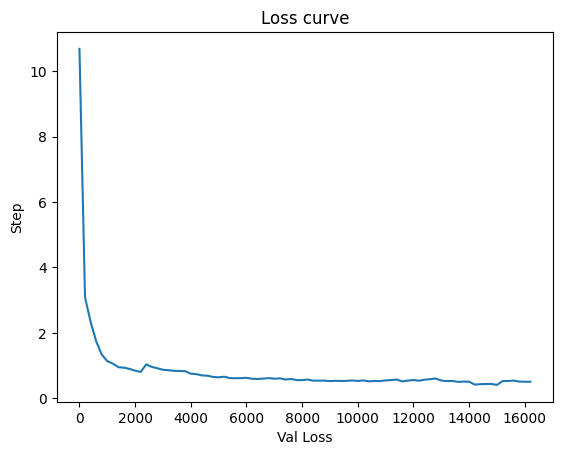

In [81]:
step, loss = extract_val_loss()
plt.plot(step, loss)
plt.xlabel("Val Loss")
plt.ylabel("Step")
plt.title("Loss curve")
plt.show()